# Javad Ranjbar Kermani
## One Feature Linear Regression

### Import libraries

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns # for plotting heatmap
import matplotlib.pyplot as plt

### Data Processing 

In [18]:
df = pd.read_csv('3D printer dataset.csv') # import 3D printer dataset as CSV file
df['infill_pattern'].replace(['grid','honeycomb'],(1,2), inplace = True) #replacing "grid" and "honeycomb" in column "infill pateerns" with numbers 1 & 2
df['material'].replace(['abs','pla'],(1,2), inplace = True) #replacing "grid" and "honeycomb" in column "infill pateerns" with numbers 1 & 2
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness
0,0.02,8,90,1,220,60,40,1,0,25
1,0.02,7,90,2,225,65,40,1,25,32
2,0.02,1,80,1,230,70,40,1,50,40
3,0.02,4,70,2,240,75,40,1,75,68
4,0.02,6,90,1,250,80,40,1,100,92


### Plotting Heatmap 

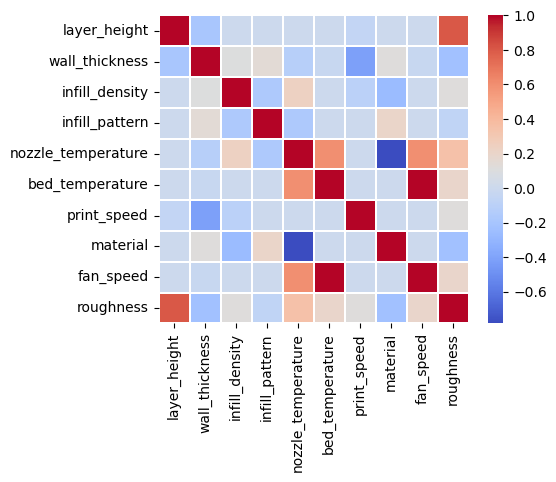

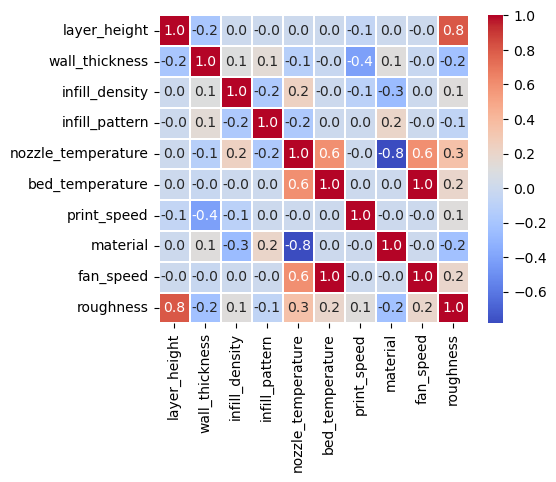

In [19]:
corr = df.corr() # corrolation of the data relative to each other
#plotting heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr, xticklabels=corr.columns,
           yticklabels=corr.columns,linewidths=0.1, cmap = 'coolwarm')
plt.figure(figsize=(5, 4))
sns.heatmap(corr, xticklabels=corr.columns,
           yticklabels=corr.columns, annot=True, fmt='.1f',linewidths=0.1, cmap = 'coolwarm')
plt.show()


In [20]:
features_name = df.columns # names of database columns
features = df.values # values of database columns
print('features_name :\n',features_name,'\n')
print('features_1 :\n',features[0,:])

features_name :
 Index(['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'material',
       'fan_speed', 'roughness'],
      dtype='object') 

features_1 :
 [2.0e-02 8.0e+00 9.0e+01 1.0e+00 2.2e+02 6.0e+01 4.0e+01 1.0e+00 0.0e+00
 2.5e+01]


In [21]:
layer_height_index = np.where(features_name=='layer_height') #finding the column number of "layer_height"
roughness_index = np.where(features_name=='roughness') #finding the column number of "roughness"
print ('layer_height_index:\t{}\n roughness_index:\t{}'.format(layer_height_index[0],roughness_index[0]))

layer_height_index:	[0]
 roughness_index:	[9]


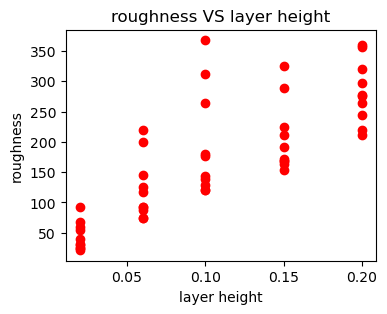

In [22]:
x = features[:,0] # data of feature "layer_height"
y = features[:,-1] # data of feature "lroughness"
# plot roughness vs layer_height
plt.figure(figsize=(4, 3)) 
plt.scatter(x,y, c='red')
plt.xlabel('layer height')
plt.ylabel('roughness')
plt.title('roughness VS layer height')
plt.show()

### gradient descent method

In [23]:
# this function calculate the optimum theta coefficients and corresponding cost function
def gradient_descent(x,y,theta_init,n,epsilon):
    """
        This function reuturns theta, final cost function, cost function array and
        maximum iteration until convergence (i).
        x : input 
        y : output
        theta_init : initial guess for theta coefficient
        alpha: learning rate
        n : maximum iteration
        epsilon : accuracy
    """
    alpha = 0.1 # learning rate
    m = len(x) # number of datas
    theta = theta_init # initial guess
    cost = np.ones((n)) #initial guess
    cost_init1 = 10 #initial guess
    cost_init2 = 0  #initial guess
    i = 0 # counter
    while abs(cost_init1 - cost_init2)>epsilon and i<n:
        cost_init2 = cost_init1
        gradient = (-2/m) *x.T.dot(y-x.dot(theta))
        theta += -alpha*gradient
        cost[i] = (1/m) * sum (np.square(y-np.dot(x,theta)))
        cost_init1 = cost[i]
        i = i+1
        if i==n:
            print('The gradient descent method is not converged')
    return(theta,cost[:i], cost[i-1],i)  

In [24]:
x = features[:,0].reshape(x.shape[0],1)
x = np.insert(x,0,1,axis=1)
y = features[:,-1].reshape(x.shape[0],1)
theta = np.random.randn(x.shape[1],1)
print(x.shape,y.shape,theta.shape)
theta_opt , cost_func_array, cost_func , i = gradient_descent(x,y,theta,n = 1000000,epsilon = 1e-8)
print(theta_opt)
print(cost_func)
print(i)

(50, 2) (50, 1) (2, 1)
[[  39.95376617]
 [1232.32311833]]
3439.539329043687
12865


### using sklearn linear regression model to estimate the coefficients

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)
weights=np.array(LR_model.coef_)
bias=LR_model.intercept_
print('weights:',weights)
print('bias:',bias)

weights: [[   0.         1275.15174342]]
bias: [37.50331011]


### Plotting the one feature linear regression results

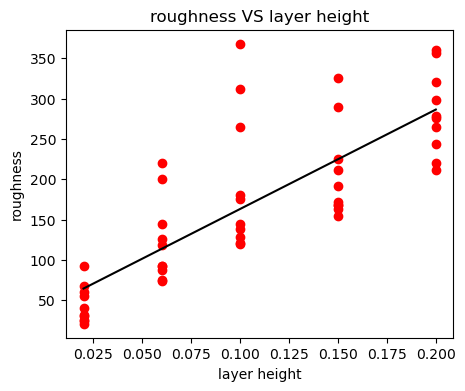

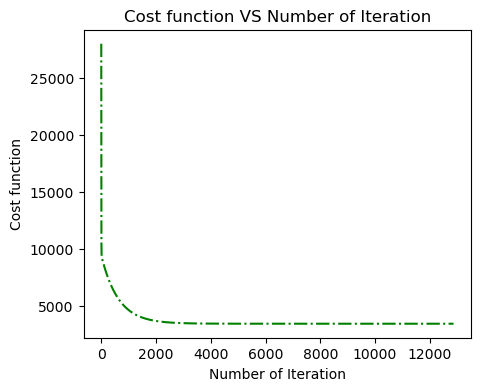

In [26]:
y_pred = np.dot(x,theta_opt)
plt.figure(figsize=(5, 4))
plt.scatter(x[:,1],y, c='red')
plt.plot([np.min(x[:,1]),np.max(x[:,1])], [np.min(y_pred),np.max(y_pred)],color='black')
plt.xlabel('layer height')
plt.ylabel('roughness')
plt.title('roughness VS layer height')
plt.show()
plt.figure(figsize=(5, 4))
plt.plot(cost_func_array, ls = '-.' , c='green')
plt.xlabel('Number of Iteration')
plt.ylabel('Cost function')
plt.title('Cost function VS Number of Iteration')
plt.show()

### 3D plot of cost function and theta coefficient 

In [27]:
xx = np.linspace(-20000,20000)
print(xx.size)
yy = np.linspace(-2000,2000)
theta0,theta1 = np.meshgrid(xx,yy)
xxx = np.delete(x,0,1)
J = np.zeros_like(theta0)
for i in range(xx.size):
    for j in range(yy.size):
        h_theta = np.array(theta0[i,j]+theta1[i,j]*xxx)
        J[i,j] = sum((np.array(y)-h_theta)**2)[0]

50


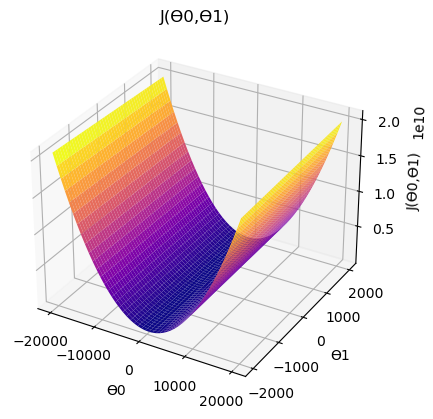

In [28]:
ax = plt.axes(projection='3d')
ax.plot_surface(theta0, theta1, J, rstride=1, cstride=1,
                cmap='plasma', edgecolor='none')
ax.set_title('J(\u03F40,\u03F41)')
ax.set_xlabel('\u03F40')
ax.set_ylabel('\u03F41')
ax.set_zlabel('J(\u03F40,\u03F41)')
plt.show()

## initializing
### Initializing the theta coefficients using rnadom normal distribution

In [13]:
%%timeit
theta_init = np.random.normal(size=(2, 1))
theta_opt , cost_func_array, cost_func , i = gradient_descent(x,y,theta,n = 100000,epsilon = 0.00000001)

131 µs ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Initializing the theta coefficients using rnadom uniform distribution

In [14]:
%%timeit
theta_init = np.random.uniform(size=(2,1))
theta_opt , cost_func_array, cost_func , i = gradient_descent(x,y,theta,n = 100000,epsilon = 0.00000001)

112 µs ± 21.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Initializing the theta coefficients considering zero

In [15]:
%%timeit
theta_init = np.zeros((2,1))
theta_opt , cost_func_array, cost_func , i = gradient_descent(x,y,theta,n = 100000,epsilon = 0.00000001)

147 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Initializing the theta coefficients using  Xavier Glorot  method

In [16]:
%%timeit
theta_init = np.random.uniform(low = -np.sqrt(3),high= np.sqrt(3),size=(2,1))
theta_opt , cost_func_array, cost_func , i = gradient_descent(x,y,theta,n = 100000,epsilon = 0.00000001)

152 µs ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
